🛡️  ADVANCED NETWORK INTRUSION DETECTION SYSTEM
[+] Dataset path confirmed: 'C:\Users\Prathamesh\Downloads\Data_Science\IDS\dataset\ids_data.csv'
[*] Loading and analyzing data from 'C:\Users\Prathamesh\Downloads\Data_Science\IDS\dataset\ids_data.csv'...
[*] Cleaning column names...
    • Cleaned 65 column names with whitespace issues
[+] Dataset loaded successfully
    • Shape: (2214469, 79)
    • Memory usage: 1493.79 MB

[*] Dataset Analysis:
    • Total samples: 2,214,469
    • Features: 78
    • Missing values: 1215
    • Duplicates: 271280

[*] Dataset columns (cleaned):
    • ['Destination Port', 'Flow Duration', 'Total Fwd Packets', 'Total Backward Packets', 'Total Length of Fwd Packets', 'Total Length of Bwd Packets', 'Fwd Packet Length Max', 'Fwd Packet Length Min', 'Fwd Packet Length Mean', 'Fwd Packet Length Std', 'Bwd Packet Length Max', 'Bwd Packet Length Min', 'Bwd Packet Length Mean', 'Bwd Packet Length Std', 'Flow Bytes/s', 'Flow Packets/s', 'Flow IAT Mean', 'Flow IAT 

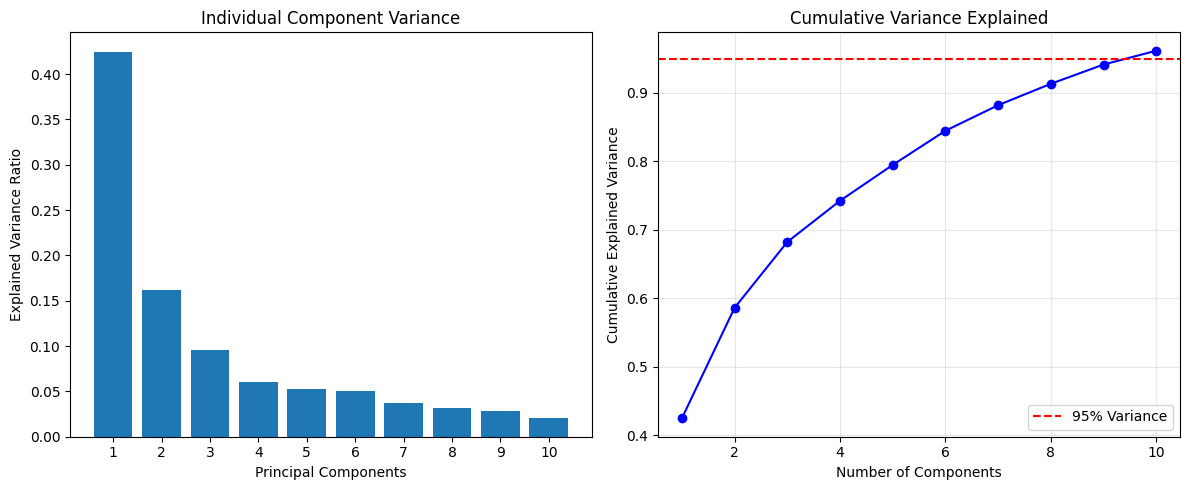


[*] Smart data balancing (strategy: combined)...
    • Original distribution:
      BENIGN: 1,528,285
      Bot: 1,953
      DDoS: 128,016
      DoS GoldenEye: 10,286
      DoS Hulk: 172,849
      DoS Slowhttptest: 5,228
      DoS slowloris: 5,385
      Heartbleed: 11
      Infiltration: 36
      PortScan: 90,819
    • Final distribution:
      BENIGN: 687,727
      Bot: 5,859
      DDoS: 384,048
      DoS GoldenEye: 30,858
      DoS Hulk: 458,485
      DoS Slowhttptest: 15,684
      DoS slowloris: 16,155
      Heartbleed: 33
      Infiltration: 108
      PortScan: 272,457
    • Dataset size: 1942868 → 1871414

[*] Splitting data (80/20 split)...
    • Minimum samples per class: 33
    • Training samples: 1,497,131
    • Testing samples: 374,283

[*] Training Random Forest with robust validation...
    • Performing 5-fold cross-validation...
    • CV F1-scores: [0.98521919 0.9834098  0.98461512 0.98496364 0.98501486]
    • CV Mean F1: 0.9846 ± 0.0006
    • Out-of-bag score: 0.9835
[+]

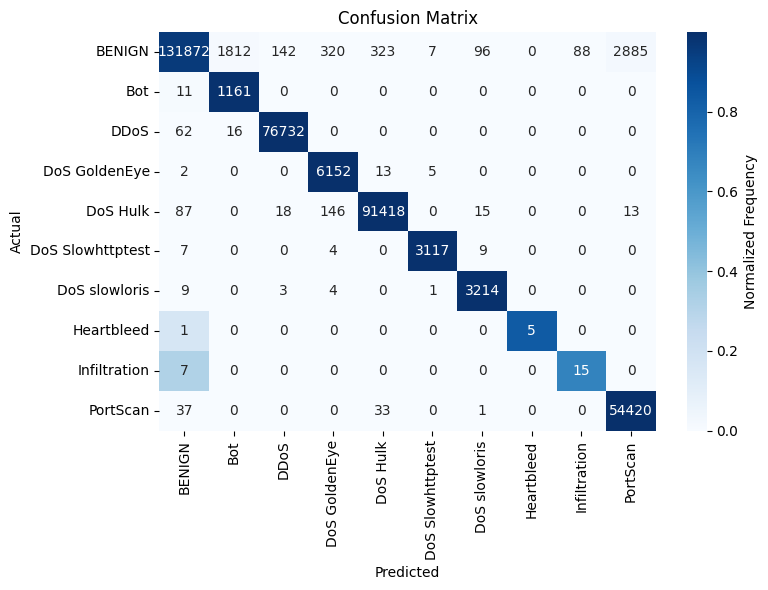


[*] Top 10 Feature Importances:
    PC3: 0.1322
    PC7: 0.1236
    PC1: 0.1213
    PC2: 0.1143
    PC6: 0.1120
    PC8: 0.0996
    PC9: 0.0984
    PC5: 0.0819
    PC4: 0.0659
    PC10: 0.0508


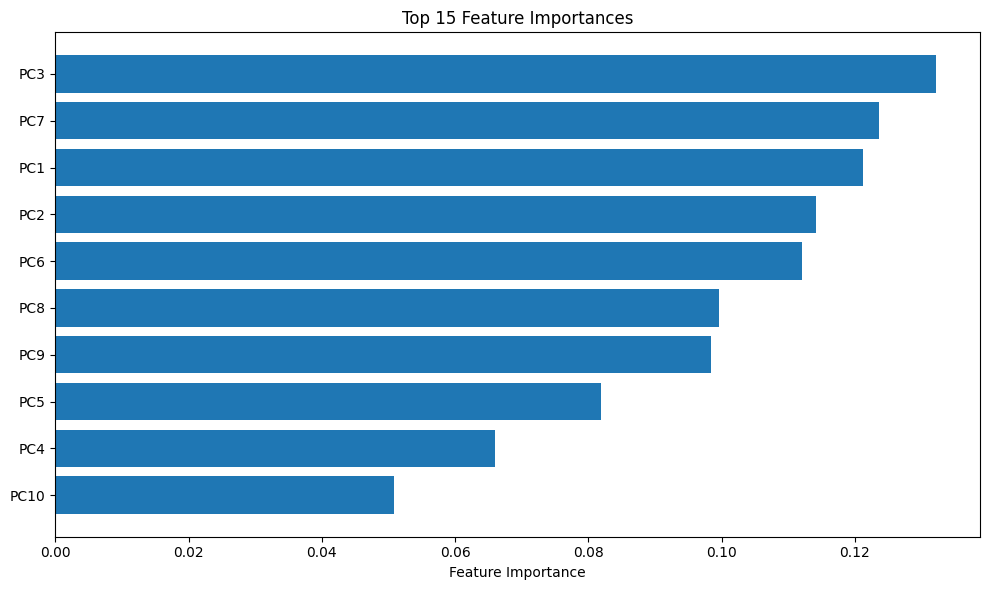


✅ ADVANCED IDS ANALYSIS COMPLETED SUCCESSFULLY

Final Results Summary:
  Accuracy: 0.9835
  Precision: 0.9871
  Recall: 0.9835
  F1_score: 0.9846


In [16]:
# Enhanced Intrusion Detection System with Robust Validation - FIXED
# Addresses potential data leakage and provides comprehensive analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (classification_report, confusion_matrix, accuracy_score, 
                           precision_score, recall_score, f1_score, roc_auc_score, 
                           roc_curve, precision_recall_curve)
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline
import warnings
warnings.filterwarnings('ignore')

# Updated dataset path
DATASET_PATH = r'C:\Users\Prathamesh\Downloads\Data_Science\IDS\dataset\ids_data.csv'

class AdvancedNetworkIDS:
    def __init__(self, dataset_path=None, random_state=42):
        if dataset_path is None:
            self.dataset_path = DATASET_PATH
        else:
            self.dataset_path = dataset_path
        
        self.random_state = random_state
        self.data = None
        self.X_train = None
        self.X_test = None
        self.y_train = None
        self.y_test = None
        
        # Models and transformers
        self.scaler = StandardScaler()
        self.pca = None
        self.feature_selector = None
        self.label_encoder = LabelEncoder()
        self.rf_model = None
        
        # Results storage
        self.feature_names = None
        self.selected_features = None
        self.evaluation_results = {}
        
    def _find_dataset_path(self):
        """Verify the dataset file path"""
        import os
        
        # First check the specified path
        if os.path.exists(DATASET_PATH):
            return DATASET_PATH
            
        # Fallback to other possible paths
        possible_paths = [
            'dataset/ids_data.csv',
            '../dataset/ids_data.csv',
            '../../dataset/ids_data.csv',
            'IDS/dataset/ids_data.csv',
            './ids_data.csv',
        ]
        
        for path in possible_paths:
            if os.path.exists(path):
                return path
        
        raise FileNotFoundError(
            f"Dataset file 'ids_data.csv' not found. Please ensure the file exists at: {DATASET_PATH}"
        )
    
    def load_and_analyze_data(self):
        """Load data with comprehensive analysis"""
        import os
        
        # Verify path exists before loading
        if not os.path.exists(self.dataset_path):
            print(f"❌ ERROR: Dataset file not found at: {self.dataset_path}")
            print(f"Please ensure the file exists at the specified location.")
            raise FileNotFoundError(f"Dataset file not found: {self.dataset_path}")
        
        print(f"[+] Dataset path confirmed: '{self.dataset_path}'")
        print(f"[*] Loading and analyzing data from '{self.dataset_path}'...")
        
        # Load data
        try:
            self.data = pd.read_csv(self.dataset_path)
        except Exception as e:
            print(f"❌ ERROR loading dataset: {str(e)}")
            raise
        
        # Clean column names (remove leading/trailing whitespace)
        print(f"[*] Cleaning column names...")
        original_columns = list(self.data.columns)
        self.data.columns = self.data.columns.str.strip()
        cleaned_columns = list(self.data.columns)
        
        # Check if any columns were renamed
        renamed_cols = [orig for orig, clean in zip(original_columns, cleaned_columns) if orig != clean]
        if renamed_cols:
            print(f"    • Cleaned {len(renamed_cols)} column names with whitespace issues")
        
        print(f"[+] Dataset loaded successfully")
        print(f"    • Shape: {self.data.shape}")
        print(f"    • Memory usage: {self.data.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
        
        # Basic analysis
        print(f"\n[*] Dataset Analysis:")
        print(f"    • Total samples: {len(self.data):,}")
        print(f"    • Features: {self.data.shape[1] - 1}")
        print(f"    • Missing values: {self.data.isnull().sum().sum()}")
        print(f"    • Duplicates: {self.data.duplicated().sum()}")
        
        # Display cleaned column names for verification
        print(f"\n[*] Dataset columns (cleaned):")
        print(f"    • {list(self.data.columns)}")
        
        # Label distribution analysis
        if 'Label' in self.data.columns:
            print(f"\n[*] Attack Type Distribution:")
            label_counts = self.data['Label'].value_counts()
            for label, count in label_counts.items():
                percentage = (count / len(self.data)) * 100
                print(f"    • {label}: {count:,} ({percentage:.2f}%)")
        else:
            print(f"❌ ERROR: 'Label' column still not found after cleaning.")
            print(f"Available columns: {list(self.data.columns)}")
            raise ValueError("Label column not found in dataset")
        
        # Check for potential data leakage indicators
        self._check_data_leakage_indicators()
        
        return self.data
    
    def _check_data_leakage_indicators(self):
        """Check for potential data leakage issues"""
        print(f"\n[*] Data Leakage Analysis:")
        
        if 'Label' not in self.data.columns:
            print(f"    • Skipping leakage analysis - no 'Label' column found")
            return
        
        # Check for features that might be too predictive
        numeric_cols = self.data.select_dtypes(include=[np.number]).columns
        numeric_cols = [col for col in numeric_cols if col != 'Label']
        
        if len(numeric_cols) > 0:
            # Encode labels temporarily for analysis
            temp_encoder = LabelEncoder()
            temp_labels = temp_encoder.fit_transform(self.data['Label'])
            
            # Calculate correlation between features and labels
            correlations = []
            for col in numeric_cols:
                if self.data[col].std() > 0:  # Avoid zero variance
                    corr = abs(np.corrcoef(self.data[col], temp_labels)[0, 1])
                    if not np.isnan(corr):
                        correlations.append((col, corr))
            
            # Sort by correlation strength
            correlations.sort(key=lambda x: x[1], reverse=True)
            
            if correlations:
                print(f"    • Features with highest correlation to labels:")
                for i, (feature, corr) in enumerate(correlations[:5]):
                    print(f"      {i+1}. {feature}: {corr:.4f}")
                    if corr > 0.9:
                        print(f"         ⚠️  WARNING: Very high correlation - potential data leakage!")
            else:
                print(f"    • No significant correlations found")
    
    def _clean_data_issues(self):
        """Clean data from control characters and invalid values"""
        print(f"      Cleaning control characters and invalid values...")
        
        # Handle text columns
        text_columns = self.data.select_dtypes(include=['object']).columns
        for col in text_columns:
            if col in self.data.columns:
                # Remove control characters and clean strings
                self.data[col] = self.data[col].astype(str).str.replace(r'[^\x20-\x7E]', '', regex=True)
                # Remove extra whitespaces
                self.data[col] = self.data[col].str.strip()
        
        # Handle numeric columns - replace invalid values
        numeric_columns = self.data.select_dtypes(include=[np.number]).columns
        for col in numeric_columns:
            if col in self.data.columns:
                # Replace infinite values with NaN
                self.data[col] = self.data[col].replace([np.inf, -np.inf], np.nan)
                # Replace extremely large values (potential errors)
                max_val = self.data[col].quantile(0.999)
                min_val = self.data[col].quantile(0.001)
                self.data[col] = np.clip(self.data[col], min_val, max_val)
    
    def _convert_data_types(self):
        """Convert columns to appropriate data types"""
        print(f"      Converting columns to appropriate data types...")
        
        # Convert object columns to numeric where possible
        for col in self.data.columns:
            if col != 'Label' and self.data[col].dtype == 'object':
                try:
                    # Try to convert to numeric
                    self.data[col] = pd.to_numeric(self.data[col], errors='coerce')
                    print(f"        • Converted {col} to numeric")
                except:
                    # If conversion fails, keep as object
                    pass
        
        # Ensure Label column is string type
        if 'Label' in self.data.columns:
            self.data['Label'] = self.data['Label'].astype(str)
    
    def comprehensive_preprocessing(self):
        """Enhanced preprocessing with leakage prevention"""
        print(f"\n[*] Starting comprehensive preprocessing...")
        
        # Verify Label column exists after cleaning
        if 'Label' not in self.data.columns:
            raise ValueError("Label column not found after preprocessing. Check column names.")
        
        # Clean data from control characters and invalid values
        print(f"    • Cleaning invalid characters and data...")
        self._clean_data_issues()
        
        # Handle missing values and infinities
        print(f"    • Handling missing values and infinities...")
        self.data.replace([np.inf, -np.inf], np.nan, inplace=True)
        
        # Convert columns to appropriate data types
        print(f"    • Converting data types...")
        self._convert_data_types()
        
        # Clean label data - remove invalid labels
        print(f"    • Cleaning label data...")
        self._clean_labels()
        
        # Fill missing values
        numeric_columns = self.data.select_dtypes(include=[np.number]).columns
        for col in numeric_columns:
            if col != 'Label' and self.data[col].isnull().sum() > 0:
                self.data[col].fillna(self.data[col].median(), inplace=True)
        
        # Remove duplicates
        initial_size = len(self.data)
        self.data.drop_duplicates(inplace=True)
        removed_dups = initial_size - len(self.data)
        print(f"    • Removed {removed_dups:,} duplicate rows")
        
        # Handle rare classes
        print(f"    • Handling rare classes...")
        self._handle_rare_classes()
        
        # Handle outliers more conservatively
        print(f"    • Handling outliers...")
        self._handle_outliers_conservative()
        
        # Remove zero variance features
        print(f"    • Removing zero variance features...")
        self._remove_zero_variance_features()
        
        print(f"[+] Preprocessing completed")
        return self.data
    
    def _handle_outliers_conservative(self):
        """Conservative outlier handling to prevent information loss"""
        numeric_features = self.data.select_dtypes(include=[np.number]).columns
        numeric_features = [col for col in numeric_features if col != 'Label']
        
        outlier_features = []
        for feature in numeric_features:
            if self.data[feature].std() > 0:
                Q1 = self.data[feature].quantile(0.05)  # More conservative
                Q3 = self.data[feature].quantile(0.95)
                IQR = Q3 - Q1
                lower_bound = Q1 - 2 * IQR  # Less aggressive
                upper_bound = Q3 + 2 * IQR
                
                outlier_count = ((self.data[feature] < lower_bound) | 
                               (self.data[feature] > upper_bound)).sum()
                
                if outlier_count > 0:
                    outlier_features.append((feature, outlier_count))
                    # Cap outliers instead of removing
                    self.data[feature] = np.clip(self.data[feature], lower_bound, upper_bound)
        
        print(f"      Processed outliers in {len(outlier_features)} features")
    
    def _remove_zero_variance_features(self):
        """Remove features with zero or near-zero variance"""
        numeric_features = self.data.select_dtypes(include=[np.number]).columns
        numeric_features = [col for col in numeric_features if col != 'Label']
        
        zero_var_features = []
        for col in numeric_features:
            if self.data[col].std() < 1e-6:  # Near zero variance
                zero_var_features.append(col)
        
        if zero_var_features:
            self.data.drop(columns=zero_var_features, inplace=True)
            print(f"      Removed {len(zero_var_features)} zero variance features")
    
    def _clean_labels(self):
        """Clean invalid labels and handle NaN values"""
        initial_count = len(self.data)
        
        # Remove rows with NaN, 'nan', or empty labels
        self.data = self.data[~self.data['Label'].isin(['nan', 'NaN', '', ' ', None])]
        self.data = self.data.dropna(subset=['Label'])
        
        # Clean label strings
        self.data['Label'] = self.data['Label'].astype(str).str.strip()
        
        # Remove any remaining invalid labels
        valid_labels = ['BENIGN', 'Bot', 'DDoS', 'DoS GoldenEye', 'DoS Hulk', 
                       'DoS Slowhttptest', 'DoS slowloris', 'Heartbleed', 
                       'Infiltration', 'PortScan']
        
        self.data = self.data[self.data['Label'].isin(valid_labels)]
        
        removed_count = initial_count - len(self.data)
        if removed_count > 0:
            print(f"      Removed {removed_count:,} rows with invalid labels")
    
    def _handle_rare_classes(self, min_samples=10):
        """Handle classes with very few samples"""
        print(f"      Analyzing class distribution for rare classes...")
        
        label_counts = self.data['Label'].value_counts()
        rare_classes = label_counts[label_counts < min_samples].index.tolist()
        
        if rare_classes:
            print(f"      Found {len(rare_classes)} rare classes: {rare_classes}")
            print(f"      Removing rare classes with < {min_samples} samples")
            
            initial_size = len(self.data)
            self.data = self.data[~self.data['Label'].isin(rare_classes)]
            removed_samples = initial_size - len(self.data)
            
            print(f"      Removed {removed_samples:,} samples from rare classes")
        
        # Show final distribution
        final_counts = self.data['Label'].value_counts()
        print(f"      Final class distribution:")
        for label, count in final_counts.items():
            print(f"        {label}: {count:,}")
    
    
    def advanced_feature_engineering(self):
        """Advanced feature engineering and selection"""
        print(f"\n[*] Advanced feature engineering...")
        
        # Check if Label column exists
        if 'Label' not in self.data.columns:
            raise ValueError("'Label' column not found in dataset. Please ensure your dataset has a 'Label' column.")
        
        # Separate features and target
        X = self.data.drop(['Label'], axis=1)
        y = self.data['Label']
        
        # Encode labels
        y_encoded = self.label_encoder.fit_transform(y)
        
        print(f"    • Features shape: {X.shape}")
        print(f"    • Target classes: {list(self.label_encoder.classes_)}")
        
        # Feature correlation analysis
        print(f"    • Analyzing feature correlations...")
        correlation_matrix = X.corr().abs()
        
        # Remove highly correlated features (more conservative threshold)
        upper_triangle = correlation_matrix.where(
            np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool)
        )
        
        highly_correlated = [column for column in upper_triangle.columns 
                           if any(upper_triangle[column] > 0.98)]  # More conservative
        
        if highly_correlated:
            print(f"      Removing {len(highly_correlated)} highly correlated features")
            X = X.drop(columns=highly_correlated)
        
        self.feature_names = X.columns.tolist()
        print(f"    • Feature count after correlation filtering: {len(self.feature_names)}")
        
        return X, y_encoded
    
    def intelligent_feature_selection(self, X, y, k_features=30):
        """Intelligent feature selection using multiple methods"""
        print(f"\n[*] Intelligent feature selection (selecting top {k_features} features)...")
        
        # Method 1: Statistical feature selection
        print(f"    • Statistical feature selection...")
        selector_stats = SelectKBest(score_func=f_classif, k=min(k_features, X.shape[1]))
        X_selected_stats = selector_stats.fit_transform(X, y)
        selected_features_stats = selector_stats.get_support(indices=True)
        
        # Method 2: Mutual information feature selection
        print(f"    • Mutual information feature selection...")
        selector_mi = SelectKBest(score_func=mutual_info_classif, k=min(k_features, X.shape[1]))
        X_selected_mi = selector_mi.fit_transform(X, y)
        selected_features_mi = selector_mi.get_support(indices=True)
        
        # Combine both methods (intersection for most robust features)
        common_features = list(set(selected_features_stats) & set(selected_features_mi))
        
        if len(common_features) >= 20:  # Use intersection if sufficient
            self.selected_features = common_features
            print(f"    • Using {len(common_features)} features common to both methods")
        else:  # Use union if intersection is too small
            self.selected_features = list(set(selected_features_stats) | set(selected_features_mi))
            print(f"    • Using {len(self.selected_features)} features from union of both methods")
        
        # Select features
        X_selected = X.iloc[:, self.selected_features]
        selected_feature_names = [self.feature_names[i] for i in self.selected_features]
        
        print(f"    • Selected features: {selected_feature_names[:10]}..." if len(selected_feature_names) > 10 
              else f"    • Selected features: {selected_feature_names}")
        
        return X_selected, selected_feature_names
    
    def apply_dimensionality_reduction(self, X, variance_ratio=0.95):
        """Apply PCA with explained variance analysis"""
        print(f"\n[*] Applying PCA (target variance: {variance_ratio*100}%)...")
        
        # Standardize features
        X_scaled = self.scaler.fit_transform(X)
        
        # Fit PCA to determine components
        pca_temp = PCA()
        pca_temp.fit(X_scaled)
        
        # Find optimal number of components
        cumsum_variance = np.cumsum(pca_temp.explained_variance_ratio_)
        n_components = np.argmax(cumsum_variance >= variance_ratio) + 1
        n_components = min(n_components, X.shape[1], 50)  # Cap at 50 components
        
        print(f"    • Components for {variance_ratio*100}% variance: {n_components}")
        print(f"    • Dimensionality reduction: {X.shape[1]} → {n_components}")
        
        # Apply PCA with optimal components
        self.pca = PCA(n_components=n_components, random_state=self.random_state)
        X_pca = self.pca.fit_transform(X_scaled)
        
        # Visualize explained variance
        self._plot_pca_variance()
        
        return X_pca
    
    def _plot_pca_variance(self):
        """Plot PCA explained variance"""
        plt.figure(figsize=(12, 5))
        
        # Plot 1: Individual explained variance
        plt.subplot(1, 2, 1)
        components_to_plot = min(20, len(self.pca.explained_variance_ratio_))
        plt.bar(range(1, components_to_plot + 1), 
                self.pca.explained_variance_ratio_[:components_to_plot])
        plt.xlabel('Principal Components')
        plt.ylabel('Explained Variance Ratio')
        plt.title('Individual Component Variance')
        plt.xticks(range(1, components_to_plot + 1))
        
        # Plot 2: Cumulative explained variance
        plt.subplot(1, 2, 2)
        cumsum_var = np.cumsum(self.pca.explained_variance_ratio_)
        plt.plot(range(1, len(cumsum_var) + 1), cumsum_var, 'bo-')
        plt.axhline(y=0.95, color='r', linestyle='--', label='95% Variance')
        plt.xlabel('Number of Components')
        plt.ylabel('Cumulative Explained Variance')
        plt.title('Cumulative Variance Explained')
        plt.legend()
        plt.grid(True, alpha=0.3)
        
        plt.tight_layout()
        plt.show()
    
    def smart_data_balancing(self, X, y, strategy='combined'):
        """Smart data balancing using combined over/under sampling"""
        print(f"\n[*] Smart data balancing (strategy: {strategy})...")
        
        # Original distribution
        unique, counts = np.unique(y, return_counts=True)
        original_distribution = dict(zip(unique, counts))
        
        print(f"    • Original distribution:")
        for class_label, count in original_distribution.items():
            original_label = self.label_encoder.inverse_transform([class_label])[0]
            print(f"      {original_label}: {count:,}")
        
        # Check if balancing is needed and feasible
        min_samples = min(counts)
        max_samples = max(counts)
        
        if min_samples < 5:
            print(f"    ⚠️  WARNING: Some classes have very few samples (min: {min_samples})")
            print(f"    • Skipping advanced balancing to prevent overfitting")
            strategy = 'none'
        
        if strategy == 'smote_only' and min_samples >= 5:
            # SMOTE only - but with safety check
            try:
                k_neighbors = min(3, min_samples - 1)  # Ensure k < min_samples
                sampler = SMOTE(random_state=self.random_state, k_neighbors=k_neighbors)
                X_balanced, y_balanced = sampler.fit_resample(X, y)
            except Exception as e:
                print(f"    ⚠️  SMOTE failed: {e}")
                print(f"    • Using original data without balancing")
                X_balanced, y_balanced = X, y
                
        elif strategy == 'combined' and min_samples >= 5:
            # Combined over and under sampling with better logic
            try:
                # More intelligent sampling strategy
                class_distribution = dict(zip(unique, counts))
                
                # Find majority and minority classes
                majority_class = max(class_distribution, key=class_distribution.get)
                majority_count = class_distribution[majority_class]
                
                # Calculate target sizes more intelligently
                target_size = int(majority_count * 0.3)  # Target size for all classes
                
                # Create sampling strategies
                over_sampling_strategy = {}
                under_sampling_strategy = {}
                
                for class_label, count in class_distribution.items():
                    if count < target_size and count >= 5:  # Under-represented classes
                        over_sampling_strategy[class_label] = min(target_size, count * 3)
                    elif count > target_size * 2:  # Over-represented classes
                        under_sampling_strategy[class_label] = int(target_size * 1.5)
                
                # Apply sampling if strategies are not empty
                if over_sampling_strategy or under_sampling_strategy:
                    steps = []
                    
                    if under_sampling_strategy:
                        steps.append(('under', RandomUnderSampler(
                            sampling_strategy=under_sampling_strategy,
                            random_state=self.random_state
                        )))
                    
                    if over_sampling_strategy:
                        k_neighbors = min(3, min(counts) - 1)
                        steps.append(('over', SMOTE(
                            sampling_strategy=over_sampling_strategy,
                            random_state=self.random_state,
                            k_neighbors=k_neighbors
                        )))
                    
                    if steps:
                        pipeline = ImbPipeline(steps)
                        X_balanced, y_balanced = pipeline.fit_resample(X, y)
                    else:
                        X_balanced, y_balanced = X, y
                else:
                    X_balanced, y_balanced = X, y
                    
            except Exception as e:
                print(f"    ⚠️  Combined balancing failed: {e}")
                print(f"    • Using original data without balancing")
                X_balanced, y_balanced = X, y
        else:
            # No balancing
            print(f"    • Using original distribution (no balancing applied)")
            X_balanced, y_balanced = X, y
        
        # New distribution
        unique_new, counts_new = np.unique(y_balanced, return_counts=True)
        new_distribution = dict(zip(unique_new, counts_new))
        
        print(f"    • Final distribution:")
        for class_label, count in new_distribution.items():
            original_label = self.label_encoder.inverse_transform([class_label])[0]
            print(f"      {original_label}: {count:,}")
        
        print(f"    • Dataset size: {len(X)} → {len(X_balanced)}")
        
        return X_balanced, y_balanced
    
    def robust_model_training(self, X_train, y_train, use_cross_validation=True):
        """Robust model training with validation"""
        print(f"\n[*] Training Random Forest with robust validation...")
        
        # Configure Random Forest with balanced parameters
        self.rf_model = RandomForestClassifier(
            n_estimators=200,           # Sufficient trees
            max_depth=15,               # Prevent overfitting
            min_samples_split=10,       # Prevent overfitting
            min_samples_leaf=5,         # Prevent overfitting
            max_features='sqrt',        # Feature randomness
            bootstrap=True,             # Bootstrap sampling
            oob_score=True,            # Out-of-bag scoring
            class_weight='balanced',    # Handle remaining imbalance
            random_state=self.random_state,
            n_jobs=-1
        )
        
        if use_cross_validation:
            # Cross-validation before final training
            print(f"    • Performing 5-fold cross-validation...")
            cv_scores = cross_val_score(
                self.rf_model, X_train, y_train, 
                cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=self.random_state),
                scoring='f1_weighted', n_jobs=-1
            )
            
            print(f"    • CV F1-scores: {cv_scores}")
            print(f"    • CV Mean F1: {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")
            
            if cv_scores.mean() > 0.99:
                print(f"    ⚠️  WARNING: Very high CV scores may indicate data leakage!")
        
        # Train final model
        self.rf_model.fit(X_train, y_train)
        
        # Out-of-bag score
        if hasattr(self.rf_model, 'oob_score_'):
            print(f"    • Out-of-bag score: {self.rf_model.oob_score_:.4f}")
            
            if self.rf_model.oob_score_ > 0.99:
                print(f"    ⚠️  WARNING: Very high OOB score may indicate overfitting!")
        
        print(f"[+] Model training completed")
        return self.rf_model
    
    def comprehensive_evaluation(self, X_test, y_test):
        """Comprehensive model evaluation with multiple metrics"""
        print(f"\n[*] Comprehensive model evaluation...")
        
        # Predictions
        y_pred = self.rf_model.predict(X_test)
        y_prob = self.rf_model.predict_proba(X_test)
        
        # Basic metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='weighted')
        recall = recall_score(y_test, y_pred, average='weighted')
        f1 = f1_score(y_test, y_pred, average='weighted')
        
        # Store results
        self.evaluation_results = {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1
        }
        
        print(f"\n[*] Performance Metrics:")
        print(f"    • Accuracy:  {accuracy:.4f}")
        print(f"    • Precision: {precision:.4f}")
        print(f"    • Recall:    {recall:.4f}")
        print(f"    • F1-Score:  {f1:.4f}")
        
        # Warning for perfect scores
        if accuracy >= 0.999:
            print(f"    ⚠️  WARNING: Near-perfect accuracy may indicate:")
            print(f"       - Data leakage")
            print(f"       - Overfitting")
            print(f"       - Test set contamination")
        
        # Detailed classification report
        print(f"\n[*] Detailed Classification Report:")
        target_names = [self.label_encoder.inverse_transform([i])[0] 
                       for i in sorted(np.unique(y_test))]
        print(classification_report(y_test, y_pred, target_names=target_names))
        
        # Confusion matrix
        self._plot_confusion_matrix(y_test, y_pred, target_names)
        
        # ROC curve for binary classification
        if len(np.unique(y_test)) == 2:
            self._plot_roc_curve(y_test, y_prob[:, 1])
        
        # Feature importance
        self._analyze_feature_importance()
        
        return self.evaluation_results
    
    def _plot_confusion_matrix(self, y_true, y_pred, target_names):
        """Plot confusion matrix"""
        plt.figure(figsize=(8, 6))
        cm = confusion_matrix(y_true, y_pred)
        
        # Normalize for better visualization
        cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
        sns.heatmap(cm_normalized, annot=cm, fmt='d', cmap='Blues',
                   xticklabels=target_names, yticklabels=target_names,
                   cbar_kws={'label': 'Normalized Frequency'})
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.tight_layout()
        plt.show()
    
    def _plot_roc_curve(self, y_true, y_prob):
        """Plot ROC curve for binary classification"""
        fpr, tpr, _ = roc_curve(y_true, y_prob)
        auc_score = roc_auc_score(y_true, y_prob)
        
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='darkorange', lw=2, 
                label=f'ROC curve (AUC = {auc_score:.3f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc="lower right")
        plt.grid(True, alpha=0.3)
        plt.show()
        
        print(f"    • AUC-ROC Score: {auc_score:.4f}")
    
    def _analyze_feature_importance(self):
        """Analyze and visualize feature importance"""
        if hasattr(self.rf_model, 'feature_importances_'):
            importances = self.rf_model.feature_importances_
            
            # Create feature importance DataFrame
            if self.pca is not None:
                feature_names = [f'PC{i+1}' for i in range(len(importances))]
            else:
                feature_names = [self.feature_names[i] for i in self.selected_features] \
                              if self.selected_features else self.feature_names
            
            importance_df = pd.DataFrame({
                'Feature': feature_names,
                'Importance': importances
            }).sort_values('Importance', ascending=False)
            
            print(f"\n[*] Top 10 Feature Importances:")
            for idx, row in importance_df.head(10).iterrows():
                print(f"    {row['Feature']}: {row['Importance']:.4f}")
            
            # Plot top features
            plt.figure(figsize=(10, 6))
            top_features = importance_df.head(15)
            plt.barh(range(len(top_features)), top_features['Importance'])
            plt.yticks(range(len(top_features)), top_features['Feature'])
            plt.xlabel('Feature Importance')
            plt.title('Top 15 Feature Importances')
            plt.gca().invert_yaxis()
            plt.tight_layout()
            plt.show()
    
    def run_complete_analysis(self, apply_pca=True, feature_selection=True, 
                             balancing_strategy='combined'):
        """Run complete IDS analysis pipeline"""
        print("="*80)
        print("🛡️  ADVANCED NETWORK INTRUSION DETECTION SYSTEM")
        print("="*80)
        
        try:
            # Step 1: Load and analyze data
            self.load_and_analyze_data()
            
            # Step 2: Comprehensive preprocessing
            self.comprehensive_preprocessing()
            
            # Step 3: Feature engineering
            X, y = self.advanced_feature_engineering()
            
            # Step 4: Feature selection (optional)
            if feature_selection:
                X, selected_feature_names = self.intelligent_feature_selection(X, y)
            
            # Step 5: Dimensionality reduction (optional)
            if apply_pca:
                X = self.apply_dimensionality_reduction(X)
            
            # Step 6: Data balancing
            X_balanced, y_balanced = self.smart_data_balancing(X, y, balancing_strategy)
            
            # Step 7: Train-test split with improved handling
            print(f"\n[*] Splitting data (80/20 split)...")
            
            # Check for classes with insufficient samples for stratification
            unique_labels, label_counts = np.unique(y_balanced, return_counts=True)
            min_samples_per_class = np.min(label_counts)
            
            print(f"    • Minimum samples per class: {min_samples_per_class}")
            
            if min_samples_per_class < 2:
                print(f"    ⚠️  WARNING: Some classes have < 2 samples. Using non-stratified split.")
                self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
                    X_balanced, y_balanced, test_size=0.2, random_state=self.random_state
                )
            else:
                # Use stratified split
                self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(
                    X_balanced, y_balanced, test_size=0.2, random_state=self.random_state,
                    stratify=y_balanced
                )
            
            print(f"    • Training samples: {len(self.X_train):,}")
            print(f"    • Testing samples: {len(self.X_test):,}")
            
            # Step 8: Model training
            self.robust_model_training(self.X_train, self.y_train)
            
            # Step 9: Comprehensive evaluation
            results = self.comprehensive_evaluation(self.X_test, self.y_test)
            
            print("\n" + "="*80)
            print("✅ ADVANCED IDS ANALYSIS COMPLETED SUCCESSFULLY")
            print("="*80)
            
            return results
            
        except Exception as e:
            print(f"\n❌ ERROR: {str(e)}")
            print("Analysis pipeline failed. Please check your data and try again.")
            import traceback
            traceback.print_exc()
            return None

# Usage Example
if __name__ == "__main__":
    # Create advanced IDS instance with the specified dataset path
    ids = AdvancedNetworkIDS()
    
    # Run complete analysis
    results = ids.run_complete_analysis(
        apply_pca=True,              # Apply PCA for dimensionality reduction
        feature_selection=True,      # Apply intelligent feature selection
        balancing_strategy='combined' # Use combined over/under sampling
    )
    
    if results:
        print(f"\nFinal Results Summary:")
        for metric, value in results.items():
            print(f"  {metric.capitalize()}: {value:.4f}")